# Inferential Statistics

In this notebook we
1. Load '../Data/data_eda.csv' which is the output of exploratory data analysis.
2. Apply inferential statistics to the following questions in Seattle Airbnb listing data.
 * Are there variables that are particularly significant in terms of Seattle Airbnb listing price?
 * Are there strong correlations between pairs of independent variables?
 * Are there strong correlation between an independent and a dependent variable? 

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.cm
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

Seattle_shapefile = '../GeoData/WA'

### Load Data

In [2]:
df = pd.read_csv('../Data/data_eda.csv')
df.head()

,price,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,latitude_longitude_bin,neighbourhood_cleansed_reverted,shapes,accommodates_bedroom_ratio,accommodates_bathroom_ratio
0,85.0,81,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",4.0,4.000000
1,150.0,81,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",4.0,4.000000
2,975.0,81,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",2.2,2.444444
3,100.0,81,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",6.0,3.000000
4,450.0,81,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",2.0,3.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
price                              3818 non-null float64
neighbourhood_cleansed             3818 non-null int64
zipcode                            3818 non-null int64
property_type                      3818 non-null int64
room_type                          3818 non-null int64
accommodates                       3818 non-null int64
bathrooms                          3818 non-null float64
bedrooms                           3818 non-null float64
beds                               3818 non-null float64
bed_type                           3818 non-null int64
guests_included                    3818 non-null int64
cancellation_policy                3818 non-null int64
cleaning_fee                       3818 non-null float64
latitude_longitude_bin             3818 non-null int64
neighbourhood_cleansed_reverted    3818 non-null object
shapes                             3818 non-null object
a

## Top Questions:
* Are there variables that are particularly significant in terms of Seattle Airbnb listing price?
* Are there strong correlations between pairs of independent variables?
* Are there strong correlation between an independent and a dependent variable?

In [4]:
def get_sub_plot(width = 20, height = 10, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_joint_plot(x, y, df):
    #ax = get_sub_plot()
    sns.jointplot(x = x, y = y, data = df, kind = 'reg')
    plt.show()
    
def plot_box_plot(x, y, data):
    ax = get_sub_plot()
    sns.boxplot(x = x, y = y, data = df, ax = ax)
    plt.show()

### Questions 1: Are there variables that are particularly significant in terms of predicting Seattle Airbnb listing price?

### Assuming listing price is porportional to accommodates, bedrooms, bathrooms. Let's verify.

In [5]:
df.columns

Index(['price', 'neighbourhood_cleansed', 'zipcode', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'guests_included', 'cancellation_policy', 'cleaning_fee',
       'latitude_longitude_bin', 'neighbourhood_cleansed_reverted', 'shapes',
       'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio'],
      dtype='object')

In [6]:
from scipy import stats

def report_pearson(x, y, data):
    correlation, p = stats.pearsonr(df[x], df[y])
    print('{:10s} {:10.2f} {:10.2f}'.format('pearson', correlation, p))

def report_spearmanr(x, y, data):
    correlation, p = stats.spearmanr(df[x], df[y])
    print('{:10s} {:10.2f} {:10.2f}'.format('spearmanr', correlation, p))    

def report_kendalltau(x, y, data):
    correlation, p = stats.kendalltau(df[x], df[y])
    print('{:10s} {:10.2f} {:10.2f}'.format('kendalltau', correlation, p))    
    
def report_x_vs_y(variables, y, df):
    for var in variables:
        print(var + ':')
        report_pearson(var, y, df)
        report_spearmanr(var, y, df)
        report_kendalltau(var, y, df)
        plot_joint_plot(var, y, df)


accommodates:
pearson          0.65       0.00
spearmanr        0.66       0.00
kendalltau       0.52       0.00


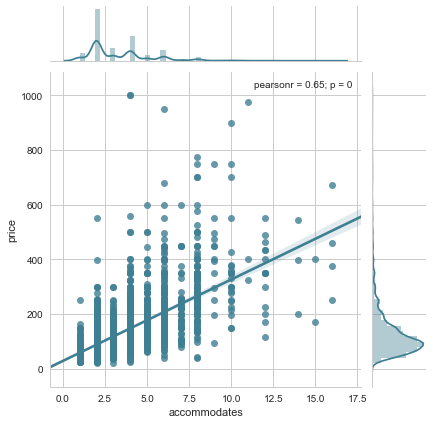

bedrooms:
pearson          0.63       0.00
spearmanr        0.52       0.00
kendalltau       0.41       0.00


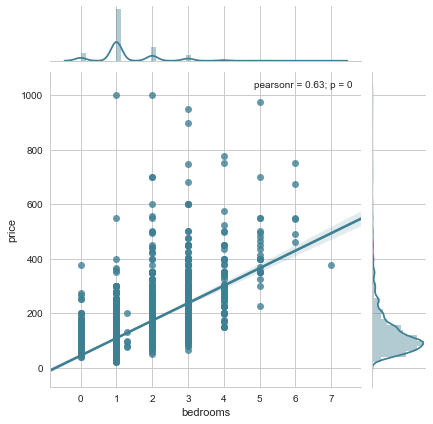

bathrooms:
pearson          0.52       0.00
spearmanr        0.37       0.00
kendalltau       0.30       0.00


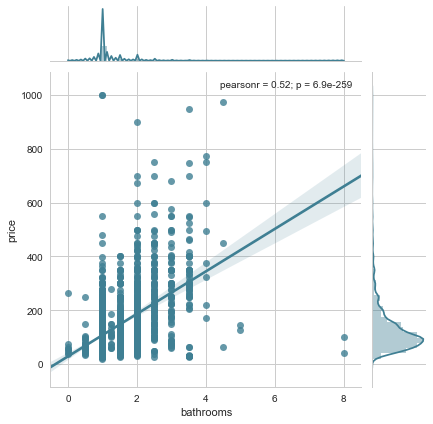

beds:
pearson          0.59       0.00
spearmanr        0.56       0.00
kendalltau       0.45       0.00


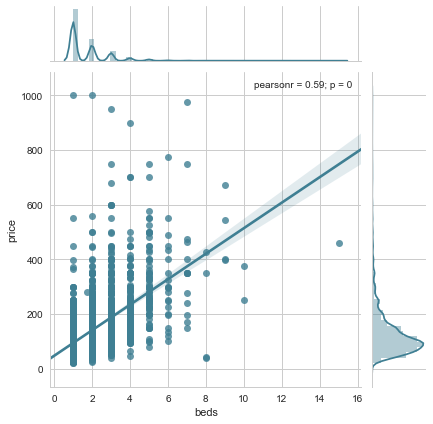

guests_included:
pearson          0.39       0.00
spearmanr        0.28       0.00
kendalltau       0.23       0.00


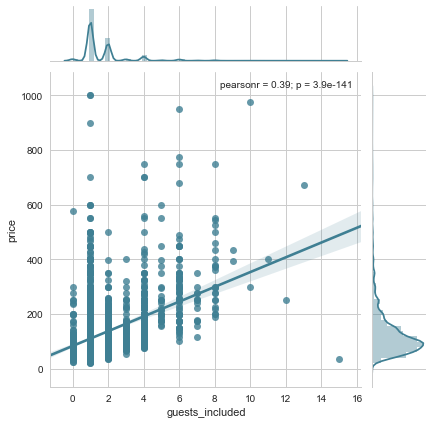

accommodates_bedroom_ratio:
pearson          0.03       0.04
spearmanr        0.23       0.00
kendalltau       0.16       0.00


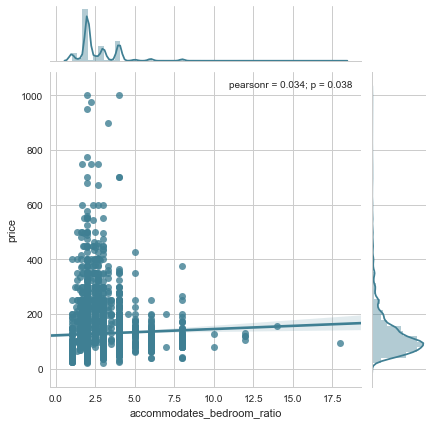

accommodates_bathroom_ratio:
pearson          0.27       0.00
spearmanr        0.47       0.00
kendalltau       0.35       0.00


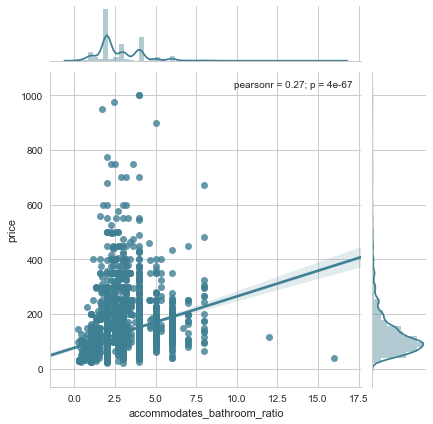

In [7]:
y = 'price'
variables = ['accommodates', 'bedrooms', 'bathrooms', 'beds',
             'guests_included', 'accommodates_bedroom_ratio', 
             'accommodates_bathroom_ratio']

report_x_vs_y(variables, y, df)

As we expected, accommodates, bedrooms, bathrooms & beds correlate most with listing price.

### Assuming listing price is correlated with property type & neighborhood. Let's verify.

property_type
F_onewayResult(statistic=3.2089846060013465, pvalue=1.5325182092288909e-05)


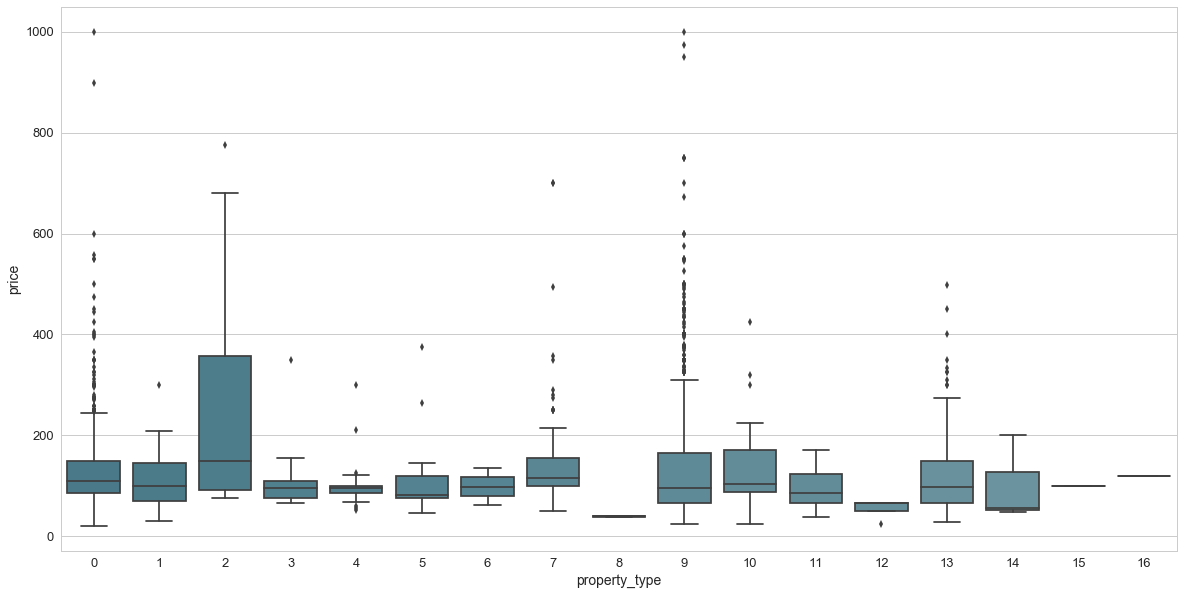

neighbourhood_cleansed
F_onewayResult(statistic=4.4692540860809009, pvalue=7.1993217013778553e-37)


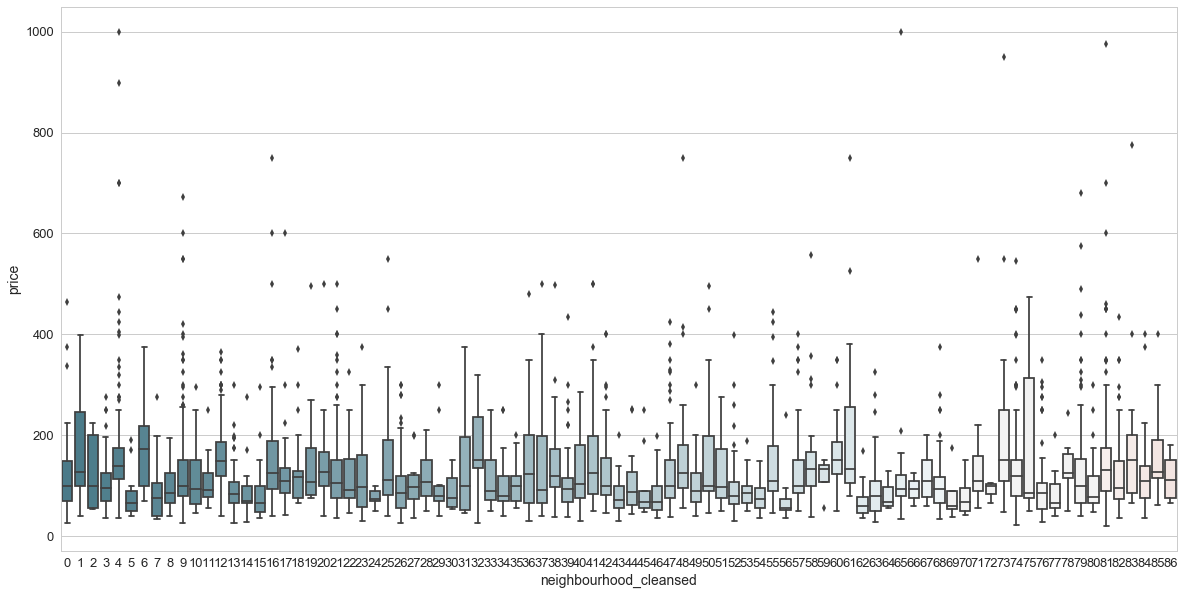

In [8]:
def anova_test(x, y, data):
    values = data.groupby(x)[y].apply(list)
    print(stats.f_oneway(*values))

def report_category_x_vs_y(variables, y, df):
    for var in variables:
        print(var)
        anova_test(x = var, y = y, data = df)  
        plot_box_plot(x = var, y = y, data = df)  

report_category_x_vs_y(['property_type', 'neighbourhood_cleansed'], y = 'price', df = df)        

As we expected, property type & neighborhood are correlated with listing price.

### Question 2: Are there strong correlations between pairs of independent variables?

### Assuming:
* bedrooms is correlated with beds.
* beds is accommodates with beds.
* bedrooms is accommodates with beds.
* bathrooms is accommodates with beds.

Let's verify.

bedrooms:
pearson          0.75       0.00
spearmanr        0.68       0.00
kendalltau       0.63       0.00


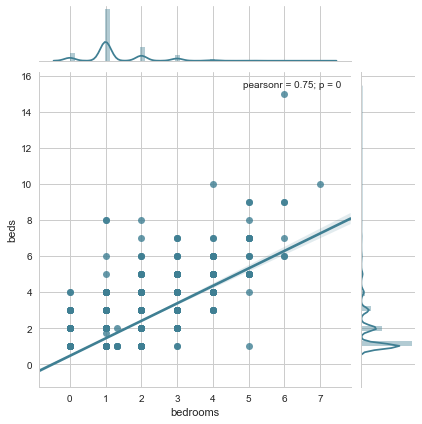

In [9]:
report_x_vs_y(['bedrooms'], 'beds', df)

beds:
pearson          0.86       0.00
spearmanr        0.83       0.00
kendalltau       0.76       0.00


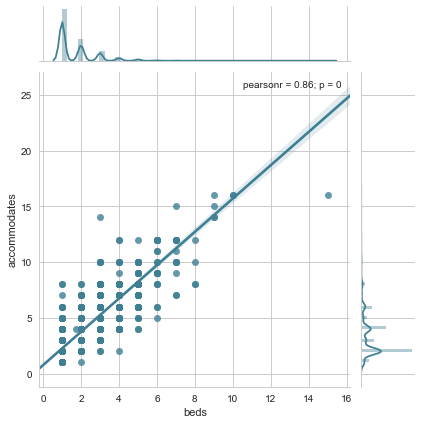

In [10]:
report_x_vs_y(['beds'], 'accommodates', df)

bedrooms:
pearson          0.77       0.00
spearmanr        0.66       0.00
kendalltau       0.58       0.00


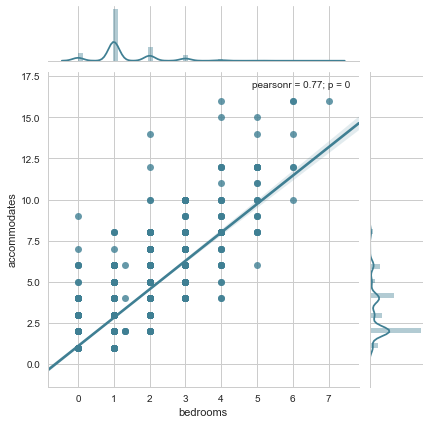

In [11]:
report_x_vs_y(['bedrooms'], 'accommodates', df)

bathrooms:
pearson          0.54       0.00
spearmanr        0.42       0.00
kendalltau       0.37       0.00


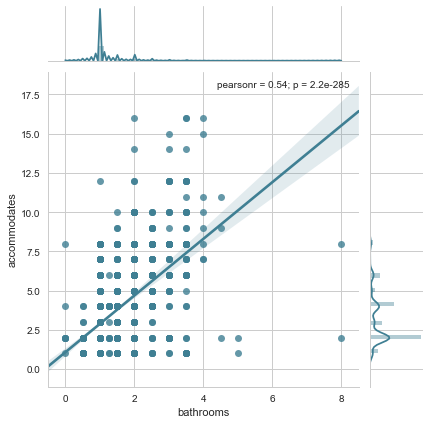

In [12]:
report_x_vs_y(['bathrooms'], 'accommodates', df)

Based on the above tests, the following independent variables are correlated:
* bedrooms is correlated with beds.
* beds is accommodates with beds.
* bedrooms is accommodates with beds.
* bathrooms is accommodates with beds.

### Question 3: Are there strong correlation between an independent and a dependent variable? 

As we expected, independent variables, like accommodates, bedrooms, bathrooms & beds are correlate with dependent variable, listing price.